In [1]:
from shape_generator.profile_gen import (Profile, circle, csv, deg2slope, std_profile, box_profile, box_profile_from_string,
                                    channel_end,
                                    notna, from_point_cloud)

In [13]:
profile_dimensions = csv("""
nr,name,r
P0,0,300
P1,1,350
P2,2,400
P3,3,450
P4,4,500
P5,5,550
P6,6,600
P7,6a,650
""")
profile_dimensions

,name,r
nr,,
P0,0,300
P1,1,350
P2,2,400
P3,3,450
P4,4,500
P5,5,550
P6,6,600
P7,6a,650


In [3]:
no = 'P0'
name, r = profile_dimensions.loc[no].values
R = 3 * r
roh = r / 2
height = r * 3
width = r * 2
# h1 = roh - (r + roh) / (R - roh) * roh
h1 = 0.2 * r

cross_section = Profile(number=no, name=name, width=width, height=height)
cross_section.add(circle(roh, x_m=roh))
cross_section.add(h1)
cross_section.add(circle(R, x_m=2 * r, y_m=-(R - r)))
cross_section.add(2 * r)
cross_section.add(circle(r, x_m=2 * r))

______________________________
Pr_P0  ->  0


In [4]:
cross_section.generator(show=True)

0 :  sqrt(-(x - 150.0)**2 + 22500.0) 
1 :  (60.0, None) 
2 :  sqrt(-(x - 600.0)**2 + 810000.0) - 600.0 
3 :  (600.0, None) 
4 :  sqrt(-(x - 600.0)**2 + 90000.0) 
          x        y
0         0        0
1        10  53.8516
2        20  74.8331
3        30       90
4        40   101.98
5        50  111.803
6        60      120
7   69.4737  127.009
8   78.9474  133.828
9   88.4211  140.464
10  97.8947  146.921
11  107.368  153.202
12  116.842  159.314
13  126.316   165.26
14  135.789  171.044
15  145.263  176.669
16  154.737  182.139
17  164.211  187.457
18  173.684  192.625
19  183.158  197.648
20  192.632  202.528
21  202.105  207.267
22  211.579  211.868
23  221.053  216.333
24  230.526  220.664
25      240  224.864
26  249.474  228.934
27  258.947  232.876
28  268.421  236.693
29  277.895  240.386
..      ...      ...
67  628.125  298.679
68    637.5  297.647
69  646.875  296.315
70   656.25  294.679
71  665.625  292.734
72      675  290.474
73  684.375   287.89
74   693.75  284.97

In [5]:
cross_section.df_abs

,x,y
0,0.00,0.00
1,9.99,53.82
2,19.98,74.79
3,29.97,90.00
4,39.96,101.97
5,50.04,111.78
6,60.03,119.97
7,69.48,126.99
8,78.93,133.83
9,88.38,140.49


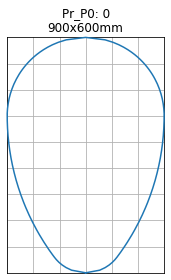

In [6]:
fig = cross_section.profile_abs_figure()

______________________________
Pr_test  ->  Kreis
[sqrt(-(x - 200.0)**2 + 40000.0)]


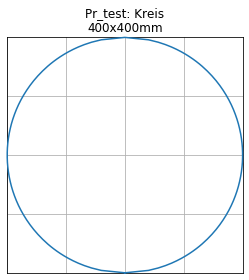

In [10]:
no = 'test'
name = 'Kreis'
r = 200

kreis = Profile(number=no, name=name, height=2*r)
kreis.add_and_show(circle(r, x_m=r))

[sqrt(-(x - 200.0)**2 + 40000.0), (200.0, 200.0)]


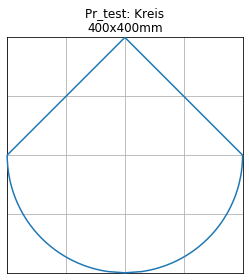

In [11]:
kreis.add_and_show(r,r)

[sqrt(-(x - 200.0)**2 + 40000.0), (200.0, 200.0), (400.0, 200.0)]


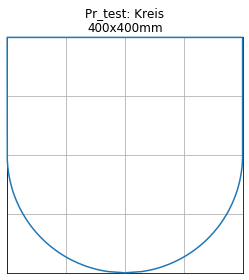

In [12]:
kreis.add_and_show(r*2,r)